In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'acc':[],
           'f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5, 1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    acc, f1 = trainer.run(lr=lr,wd=0.0,train_dataloader=data.train_dataloader,eval_dataloader=data.eval_dataloader,test_dataloader=data.test_dataloader, early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search microsoft/deberta-base, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.0481	Val Loss:	1.7983	Accuracy:	0.3432	F1:	0.1496
2 / 30: Train Loss:	1.5168	Val Loss:	1.2311	Accuracy:	0.6065	F1:	0.4259
3 / 30: Train Loss:	1.0045	Val Loss:	1.0110	Accuracy:	0.6450	F1:	0.4896
4 / 30: Train Loss:	0.6774	Val Loss:	0.9297	Accuracy:	0.6805	F1:	0.5971
5 / 30: Train Loss:	0.4702	Val Loss:	0.9109	Accuracy:	0.7367	F1:	0.7092
6 / 30: Train Loss:	0.3574	Val Loss:	0.9639	Accuracy:	0.7189	F1:	0.7035
7 / 30: Train Loss:	0.2668	Val Loss:	0.8678	Accuracy:	0.7456	F1:	0.7327
8 / 30: Train Loss:	0.1885	Val Loss:	0.9278	Accuracy:	0.7189	F1:	0.7137
9 / 30: Train Loss:	0.1236	Val Loss:	0.9394	Accuracy:	0.7367	F1:	0.7322
10 / 30: Train Loss:	0.0886	Val Loss:	0.9274	Accuracy:	0.7426	F1:	0.7467
11 / 30: Train Loss:	0.0613	Val Loss:	0.9385	Accuracy:	0.7604	F1:	0.7585
12 / 30: Train Loss:	0.0480	Val Loss:	1.1046	Accuracy:	0.7160	F1:	0.7075
13 / 30: Train Loss:	0.0416	Val Loss:	0.9765	Accuracy:	0.7456	F1:	0.7485
14 / 30: Train Loss:	0.0282	Val Loss:	0.9661	Accuracy:	0.757

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.6918	Val Loss:	2.1798	Accuracy:	0.1686	F1:	0.0321
2 / 30: Train Loss:	1.5079	Val Loss:	1.1876	Accuracy:	0.6272	F1:	0.5073
3 / 30: Train Loss:	0.7559	Val Loss:	1.0652	Accuracy:	0.6805	F1:	0.6179
4 / 30: Train Loss:	0.4188	Val Loss:	0.9550	Accuracy:	0.7189	F1:	0.6870
5 / 30: Train Loss:	0.2309	Val Loss:	0.9372	Accuracy:	0.7308	F1:	0.7199
6 / 30: Train Loss:	0.1262	Val Loss:	0.9849	Accuracy:	0.7308	F1:	0.7066
7 / 30: Train Loss:	0.0670	Val Loss:	1.1523	Accuracy:	0.7160	F1:	0.6872
8 / 30: Train Loss:	0.0568	Val Loss:	1.1298	Accuracy:	0.7278	F1:	0.7111
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.70      0.81      0.75        67
               anecdote       0.74      0.91      0.81        43
         cherry picking       0.69      0.73      0.71        56
      conspiracy theory       0.88      0.74      0.81        39
          

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.4304	Val Loss:	1.1321	Accuracy:	0.6006	F1:	0.4943
2 / 30: Train Loss:	0.7063	Val Loss:	1.1821	Accuracy:	0.6568	F1:	0.5964
3 / 30: Train Loss:	0.4161	Val Loss:	1.1387	Accuracy:	0.6953	F1:	0.6477
4 / 30: Train Loss:	0.3334	Val Loss:	1.2208	Accuracy:	0.7308	F1:	0.7144
5 / 30: Train Loss:	0.2304	Val Loss:	1.3964	Accuracy:	0.6538	F1:	0.6481
6 / 30: Train Loss:	0.1342	Val Loss:	1.2419	Accuracy:	0.7160	F1:	0.7079
7 / 30: Train Loss:	0.1058	Val Loss:	1.2637	Accuracy:	0.7012	F1:	0.6858
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.80      0.55      0.65        67
               anecdote       0.94      0.70      0.80        43
         cherry picking       0.53      0.84      0.65        56
      conspiracy theory       0.71      0.92      0.80        39
           fake experts       0.83      0.42      0.56        12
           false 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

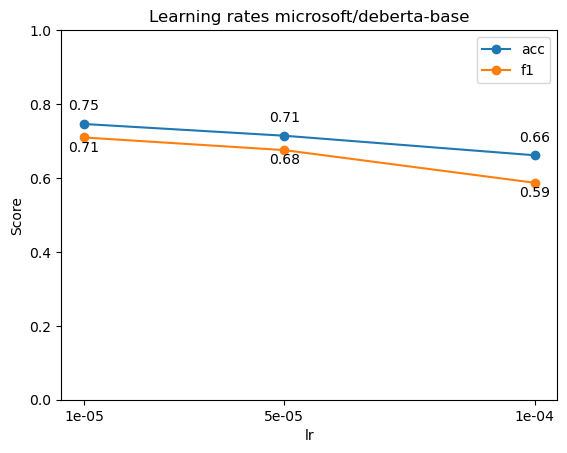

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='lr', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["lr"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["lr"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['lr'], [f'{val:.0e}' for val in df['lr']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('lr')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Learning rates {model_checkpoint}')